In [132]:
import pandas as pd 
import matplotlib.pyplot as plt 
from bbg import bdh, bdh_bulk, Pybbg
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import numpy as np
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
pd.options.plotting.backend = "matplotlib"
import pdblp

In [111]:
df = pd.read_excel('etf.xlsx')
del df['Unnamed: 0']
# update data
a = Pybbg()
field = a.bdp(ticker = df.Ticker,fld_list =  ['CURRENT_TRR_3YR','CURRENT_TRR_1YR' ,'CURRENT_TRR_YTD','FUND_PE_RATIO','EQY_SHARPE_RATIO_1YR','EQY_SHARPE_RATIO_5YR','CURRENT_ANN_TRR_5YR']).transpose()
field.index.name = 'Ticker'
field.reset_index(inplace = True)
df = df.merge(field)
df.to_excel('etf.xlsx')
#chang pe ratio to negative for the ease of recommendation list
df['FUND_PE_RATIO']  = df['FUND_PE_RATIO'] * (-1)
df = df[df['industry'].isin(['Thematic',
 'Energy',
 'Materials',
 'Technology',
 'Consumer Discretionary',
 'Health Care',
 'Industrials',
 'Financial',
 'Consumer Staples',
 'Communications',
 'Utilities',
 'Real Estate'])]

### Top recommendations

In [112]:
# scoring criteri
scoring_dic = {'EQY_SHARPE_RATIO_1YR':0.1,'EQY_SHARPE_RATIO_5YR':0.4,'CURRENT_ANN_TRR_5YR':0.1,'CURRENT_TRR_1YR':0.1,
           'CURRENT_TRR_YTD':0.2,'FUND_PE_RATIO':0.1}


def scoring(scoring_dic): 
    """scoring_dic = {'EQY_SHARPE_RATIO_1YR':0.2,'EQY_SHARPE_RATIO_5YR':0.2,'CURRENT_ANN_TRR_5YR':0.2,'CURRENT_TRR_1YR':0.2,
           'CURRENT_TRR_YTD':0.2} """
    rst = df[['Name','Ticker','style','industry'] + list(scoring_dic.keys())]
    for i in scoring_dic.keys(): 
        rst[i] = (rst[i].rank()) * scoring_dic [i]

    rst['total_score'] = rst[list(scoring_dic.keys())].sum(axis = 1)
    rst['total_score'] = (rst['total_score'] /rst['total_score'].max()) * 100 
    rst = rst.sort_values(by = 'total_score', ascending = False)
    return rst 

recommendation = scoring(scoring_dic)
df = df.merge(recommendation[['Ticker','total_score']]).sort_values(by = 'total_score',ascending = False)
df[['Name','Ticker','style','industry','total_score','holdings'] + list(scoring_dic.keys())].head(10)

Name          Ticker   style    industry  \
24  FIRST TRUST NASDAQ CLEAN EDG  QCLN US Equity  Growth      Energy   
2             ARK INNOVATION ETF  ARKK US Equity  Growth    Thematic   
0   ARK NEXT GENERATION INTERNET  ARKW US Equity  Growth    Thematic   
20   ARK AUTONOMOUS TECH & ROBOT  ARKQ US Equity  Growth    Thematic   
62   ISHARES GLOBAL CLEAN ENERGY  ICLN US Equity  Growth      Energy   
54  GLOBAL X LITHIUM & BATTERY T   LIT US Equity   Blend   Materials   
35  INVESCO WILDERHILL CLEAN ENE   PBW US Equity  Growth    Thematic   
56   INVESCO GLOBAL CLEAN ENERGY   PBD US Equity  Growth    Thematic   
17  INVESCO DYNAMIC SEMICONDUCTO   PSI US Equity  Growth  Technology   
39    ARK GENOMIC REVOLUTION ETF  ARKG US Equity  Growth    Thematic   

    total_score  holdings  EQY_SHARPE_RATIO_1YR  EQY_SHARPE_RATIO_5YR  \
24   100.000000      44.0                  2.41                  1.15   
2     99.993620      51.0                  2.44                  1.31   
0     98.889952      56.0                  2.60                  1.54   
20    98.819777      42.0                  2.35                  1.21   
62    98.398724      31.0                  2.40                  0.98   
54    98.334928      45.0                  2.28                  1.01   
35    98.328549      56.0                  2.26                  1.05   
56    97.977671     108.0                  2.36                  1.02   
17    97.779904      31.0                  1.48                  1.21   
39    97.550239      51.0                  2.94                  1.03   

    CURRENT_ANN_TRR_5YR  CURRENT_TRR_1YR  CURRENT_TRR_YTD  FUND_PE_RATIO  
24             43.01772        227.49150        18.980480     -177.25250  
2              52.85608        178.66640        14.450960            NaN  
0              55.00954        164.44680         8.902705            NaN  
20             39.55880        123.68710        12.478690            NaN  
62             32.63221        179.17070        17.422100      -70.38416  
54             33.85861        157.42540        14.509620      -74.55522  
35             45.05750        245.96850        18.202920     -375.16380  
56             33.00777        173.24230        14.273380     -114.45630  
17             37.88136         64.87952         6.928425      -43.67300  
39             44.63610        212.82100        13.510610            NaN

### Recommendation by industry sorted by total score

In [114]:
df.set_index('Ticker', inplace = True )
industrylist = [ x for x in df.industry.unique() if x != np.nan]

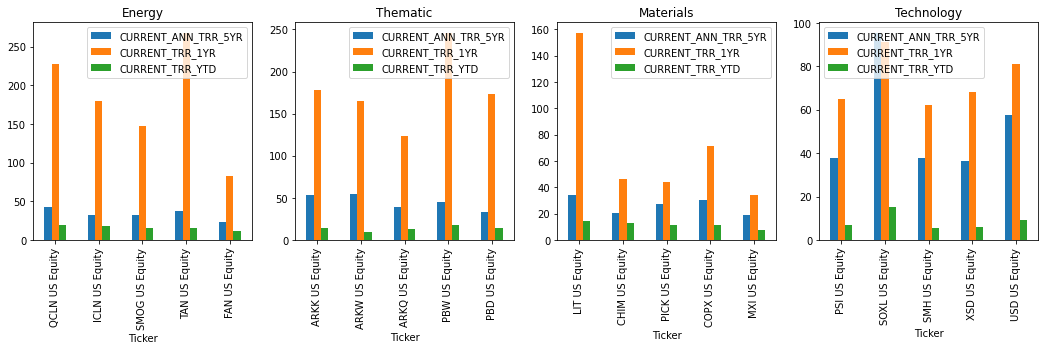

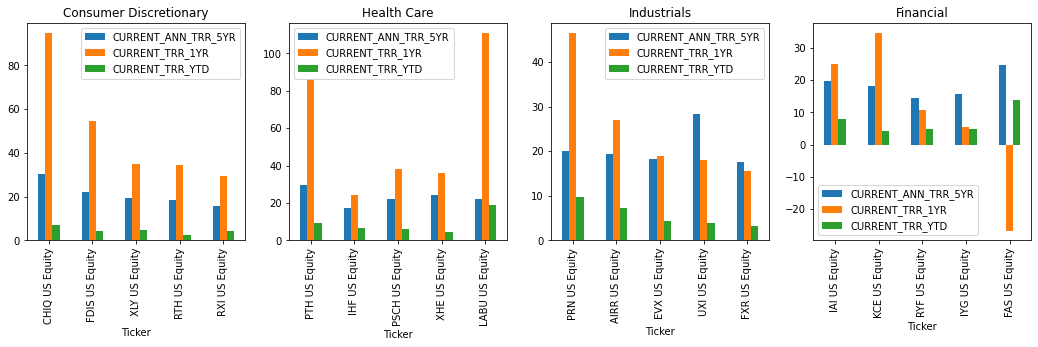

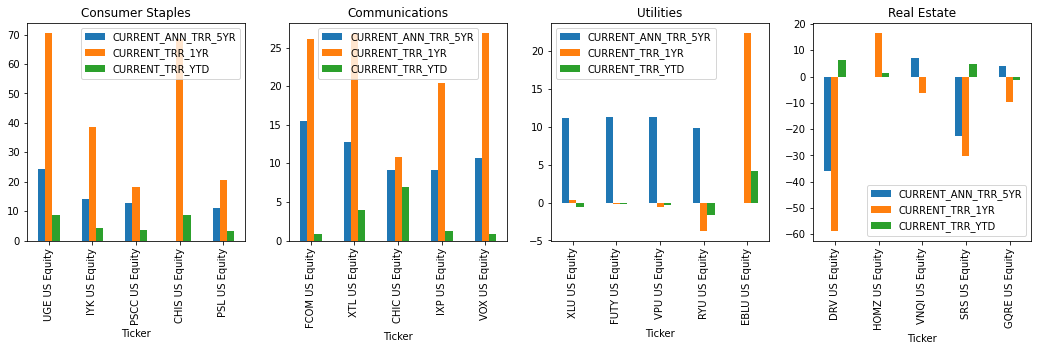

In [119]:
flds = ['EQY_SHARPE_RATIO_1YR','EQY_SHARPE_RATIO_5YR']
flds = ['CURRENT_ANN_TRR_5YR','CURRENT_TRR_1YR','CURRENT_TRR_YTD']

for i in range(0, len(industrylist),4):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))  
    df[df.industry == industrylist[i]][['style','industry','total_score'] + list(scoring_dic.keys())].head(5)[flds].plot(kind = 'bar', ax = axes[0], title =str(industrylist[i] ) )
    df[df.industry == industrylist[i+1]][['style','industry','total_score'] + list(scoring_dic.keys())].head(5)[flds].plot(kind = 'bar', ax = axes[1], title = str(industrylist[i+1]) )
    df[df.industry == industrylist[i+2]][['style','industry','total_score'] + list(scoring_dic.keys())].head(5)[flds].plot(kind = 'bar', ax = axes[2], title = str(industrylist[i+2]))
    df[df.industry == industrylist[i+3]][['style','industry','total_score'] + list(scoring_dic.keys())].head(5)[flds].plot(kind = 'bar', ax = axes[3], title = str(industrylist[i+3]) )

### Recommendation by style, sort by total score

<AxesSubplot:title={'center':'Blend'}, xlabel='Ticker'>

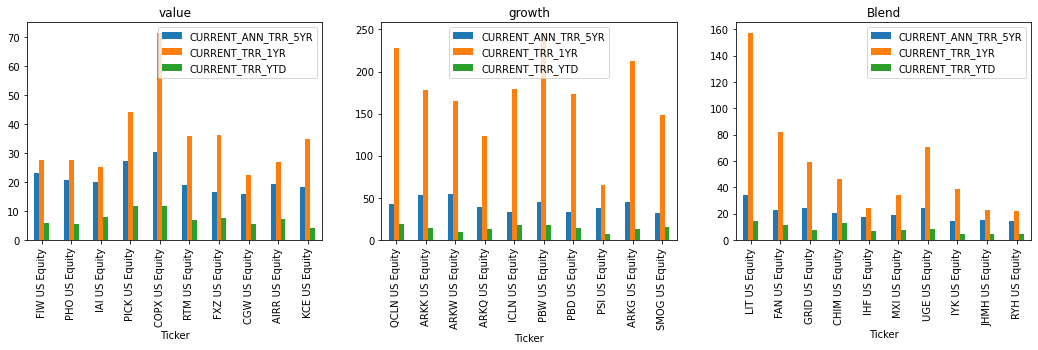

In [127]:
flds = ['EQY_SHARPE_RATIO_1YR','EQY_SHARPE_RATIO_5YR']
flds = ['CURRENT_ANN_TRR_5YR','CURRENT_TRR_1YR','CURRENT_TRR_YTD']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))  
df[df['style'] == 'Value'][['style','industry','total_score'] + list(scoring_dic.keys())].head(10)[flds].plot(kind = 'bar', ax = axes[0], title = 'value' )

df[df['style'] == 'Growth'][['style','industry','total_score'] + list(scoring_dic.keys())].head(10)[flds].plot(kind = 'bar', ax = axes[1], title = 'growth' )
df[df['style'] == 'Blend'][['style','industry','total_score'] + list(scoring_dic.keys())].head(10)[flds].plot(kind = 'bar', ax = axes[2], title = 'Blend' )



# Watchlist  Price

In [130]:
watchlist = pd.DataFrame()
for i in ['Value','Growth','Blend']:
    watchlist = watchlist.append(df[df['style'] == i][['style','industry','total_score'] + list(scoring_dic.keys())].head(10))
    

In [147]:
con = pdblp.BCon(debug=False, port=8194)
con.start()
price = con.bdh(list(watchlist.index),'PX_LAST','20050101','20500101')

In [170]:
price.iplot(title = 'Price from 2005~2050')

In [167]:
chg = price/price.shift(5)-1
chg.tail(1).sort_values(by  =chg.index[-1]  ,axis = 1, ascending = False ).iplot(kind ='bar',title = '1W price change')

In [168]:
chg = price/price.shift(26*3)-1
chg.tail(1).sort_values(by  =chg.index[-1]  ,axis = 1, ascending = False ).iplot(kind ='bar',title = '3m price change')

In [169]:
chg = price/price.shift(26*12)-1
chg.tail(1).sort_values(by  =chg.index[-1]  ,axis = 1, ascending = False ).iplot(kind ='bar',title = '1y price change')

In [10]:
def all_bar_plot(category,metric,top  ):
    rst = pd.DataFrame()
    for i in df[category].unique(): 
        subdf = df[df[category] == i]
        subdf = subdf.sort_values(by = metric, ascending = False).head(top)
        rst = rst.append(subdf)
    rst = rst.sort_values(by =metric, ascending = False)
    rst.reset_index(inplace = True)
    rst.set_index([category,'Ticker'],inplace = True)
    rst[[metric]].iplot(kind='bar',title = metric + ' by ' + category)

In [11]:
all_bar_plot('industry','CURRENT_TRR_YTD',3 )

In [12]:
all_bar_plot('industry','CURRENT_TRR_1YR',3 )

In [13]:
all_bar_plot('industry','CURRENT_TRR_3YR',3 )

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')